In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df =pd.read_csv("../all_csv/movieDB_API_movies_w_gross_profits_&_ROI.csv")

In [3]:
df.sort_values(by='ROI (%)',ascending=False).head()

,Unnamed: 0,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,ROI (%)
3309,5332,15000,"['Horror', 'Mystery']",23827,tt1179904,14.949,2009-09-25,193355800,86.0,Paranormal Activity,5.9,3125,193340800.0,1.288939e+06
2693,4348,60000,"['Horror', 'Mystery']",2667,tt0185937,11.060,1999-07-14,248000000,81.0,The Blair Witch Project,6.3,2603,247940000.0,4.132333e+05
2292,3733,12000,"['Comedy', 'Crime']",692,tt0069089,6.530,1972-03-12,6000000,92.0,Pink Flamingos,6.5,232,5988000.0,4.990000e+04
4173,6757,100000,"['Horror', 'Thriller']",299245,tt2309260,6.964,2015-07-10,42664410,87.0,The Gallows,4.8,657,42564410.0,4.256441e+04
3914,6302,130000,"['Drama', 'Thriller', 'Horror']",83,tt0374102,7.539,2003-12-29,54667954,79.0,Open Water,5.4,646,54537954.0,4.195227e+04


##  Create subset to filter out movies with no known gross profit

In [4]:
movies_with_gross_profit = df[df['gross_profit'].notna()]

In [5]:
movies_with_gross_profit.shape

(4273, 14)

In [6]:
movies_with_gross_profit['ROI (%)'] = movies_with_gross_profit['ROI (%)'].map(lambda x: round(x,2))

In [7]:
# plot distribution of ROIs in our subset

In [8]:
movies_with_gross_profit['ROI (%)'].mean()

851.5671074186781

In [9]:
# filter out data for outliers (anything past 2 std away)
def reject_outliers(data, m=2):
    return data[abs(data['ROI (%)'] - np.mean(data['ROI (%)'])) < m * np.std(data['ROI (%)'])]


In [10]:
# movies where gross profit is not null filtered out for outliers based on the ROI column
subset_movies = reject_outliers(movies_with_gross_profit)

In [11]:
subset_movies.shape

(4269, 14)

In [12]:
subset_roi = reject_outliers(movies_with_gross_profit)['ROI (%)']

In [13]:
subset_roi.describe()

count     4269.000000
mean       431.977006
std       1551.852649
min       -100.000000
25%         14.790000
50%        145.390000
75%        372.750000
max      41952.270000
Name: ROI (%), dtype: float64

In [14]:
filtered_roi = movies_with_gross_profit[(movies_with_gross_profit['ROI (%)'] > 5000) & (movies_with_gross_profit['ROI (%)'] < 20000) ]['ROI (%)']

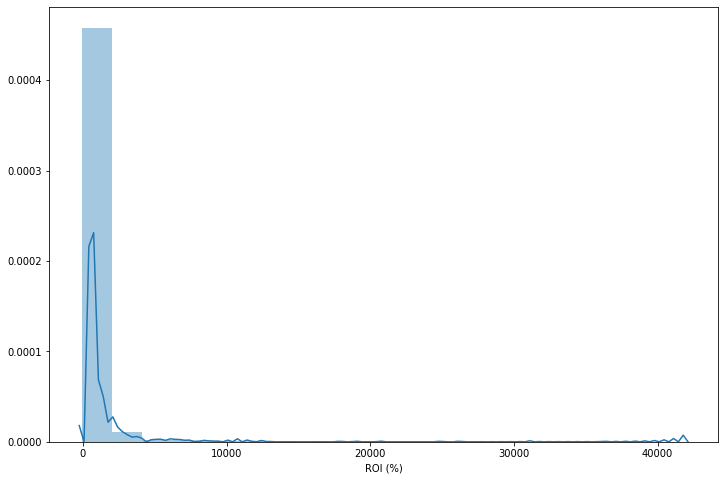

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(subset_roi,bins=20)

## Analyzing length of movie and movie profit

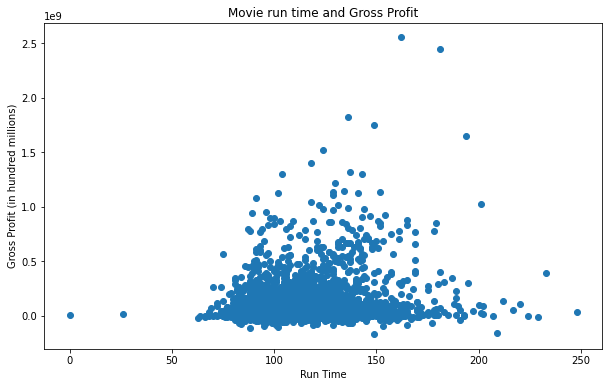

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(subset_movies['runtime'],subset_movies['gross_profit']);
plt.title('Movie run time and Gross Profit')
plt.xlabel('Run Time')
plt.ylabel('Gross Profit (in hundred millions)')
plt.show()


In [17]:
# looks like we can find a good movie length.... look further...

Plotting the run time and mean of gross profit

In [18]:
group_rt_gp = subset_movies[['runtime','revenue']]

In [19]:
group_rt_gp

,runtime,revenue
0,190.0,100000000
1,142.0,28341469
2,175.0,245066411
3,132.0,201055038
4,195.0,321365567
...,...,...
4268,96.0,10442808
4269,87.0,14109284
4270,118.0,21400000
4271,90.0,13818181


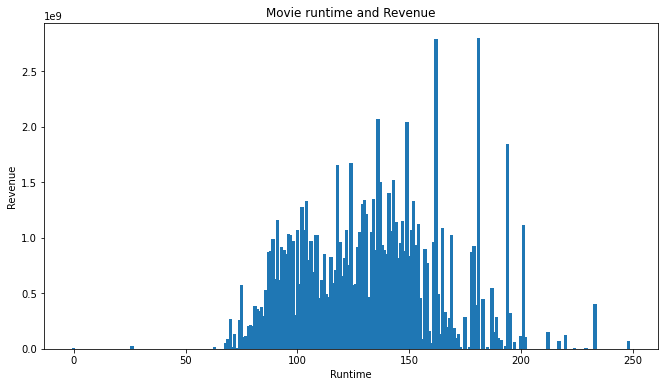

In [20]:
plt.figure(figsize=(11,6));
plt.bar(group_rt_gp['runtime'],group_rt_gp['revenue'],width=1.5);
plt.title('Movie runtime and Revenue');
plt.xlabel('Runtime');
plt.ylabel('Revenue'),
plt.show()


In [21]:
# whats the average runtime for movies with their ROI over a certain amount

## Analyzing release month and gross profit

1. Is there a month where people will spend more to watch a movie? 
2. Maybe we should release our film during a specific time of the year?

In [22]:
# Creating pandas datetime from the release date string
movies_with_gross_profit['release_date'] = pd.to_datetime(movies_with_gross_profit['release_date'])

In [23]:
# Adding column for the month of year it was released
movies_with_gross_profit['release_month'] = pd.DatetimeIndex(movies_with_gross_profit['release_date']).month

In [24]:
# creating table for the plot
grouped_by_month = movies_with_gross_profit.groupby(['release_month']).mean().reset_index()
month_and_gp =grouped_by_month[['release_month','gross_profit']]
month_and_gp

,release_month,gross_profit
0,1,4.318331e+07
1,2,6.030782e+07
2,3,7.743303e+07
3,4,8.725812e+07
4,5,1.334785e+08
5,6,1.410546e+08
6,7,1.078288e+08
7,8,4.811661e+07
8,9,3.912906e+07
9,10,6.203410e+07


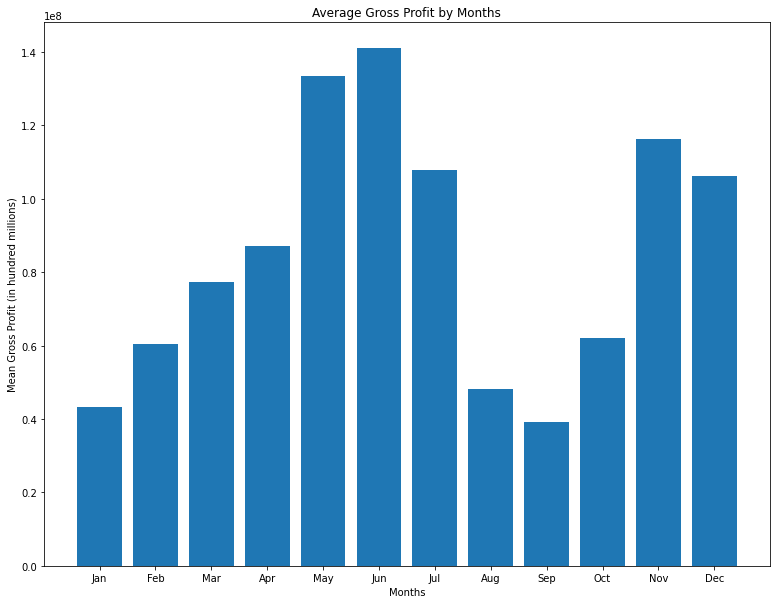

In [25]:
plt.figure(figsize=(13,10));
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x=months,height=month_and_gp['gross_profit']);
plt.xlabel('Months')
plt.ylabel('Mean Gross Profit (in hundred millions)')
plt.title('Average Gross Profit by Months')
plt.show()

Looks like movies which are released in early summer (June) have a better gross profit

Lets see if this theory holds true for revenue (sales)

In [26]:
# repeating process for revenue
grouped_by_month = movies_with_gross_profit.groupby(['release_month']).mean().reset_index()
month_and_r =grouped_by_month[['release_month','revenue']]
month_and_r

,release_month,revenue
0,1,7.202181e+07
1,2,9.328612e+07
2,3,1.179174e+08
3,4,1.257822e+08
4,5,1.859021e+08
5,6,1.942450e+08
6,7,1.552442e+08
7,8,8.015194e+07
8,9,6.455511e+07
9,10,9.522860e+07


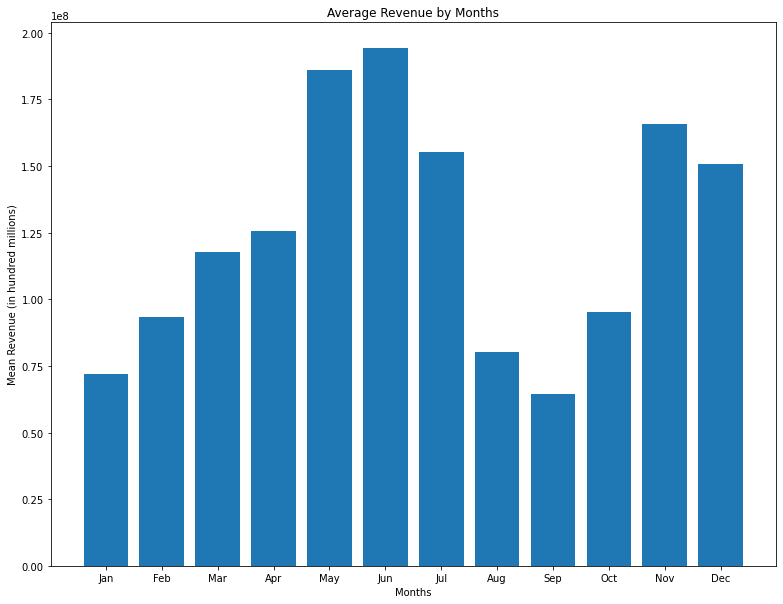

In [27]:
plt.figure(figsize=(13,10));
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x=months,height=month_and_r['revenue']);
plt.xlabel('Months')
plt.ylabel('Mean Revenue (in hundred millions)')
plt.title('Average Revenue by Months')
plt.show()

Indeed! Movies released in June have the highest revenue! cool